Epoch 1/50
235/235 [==============================] - 13s 43ms/step - loss: 0.2728 - val_loss: 0.1927
Epoch 2/50
235/235 [==============================] - 10s 41ms/step - loss: 0.1729 - val_loss: 0.1551
Epoch 3/50
235/235 [==============================] - 6s 26ms/step - loss: 0.1456 - val_loss: 0.1349
Epoch 4/50
235/235 [==============================] - 11s 47ms/step - loss: 0.1296 - val_loss: 0.1224
Epoch 5/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1192 - val_loss: 0.1141
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1118 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 12s 50ms/step - loss: 0.1066 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 10s 42ms/step - loss: 0.1028 - val_loss: 0.1000
Epoch 9/50
235/235 [==============================] - 11s 45ms/step - loss: 0.1000 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 10s 44ms/step - loss: 0.0978 -

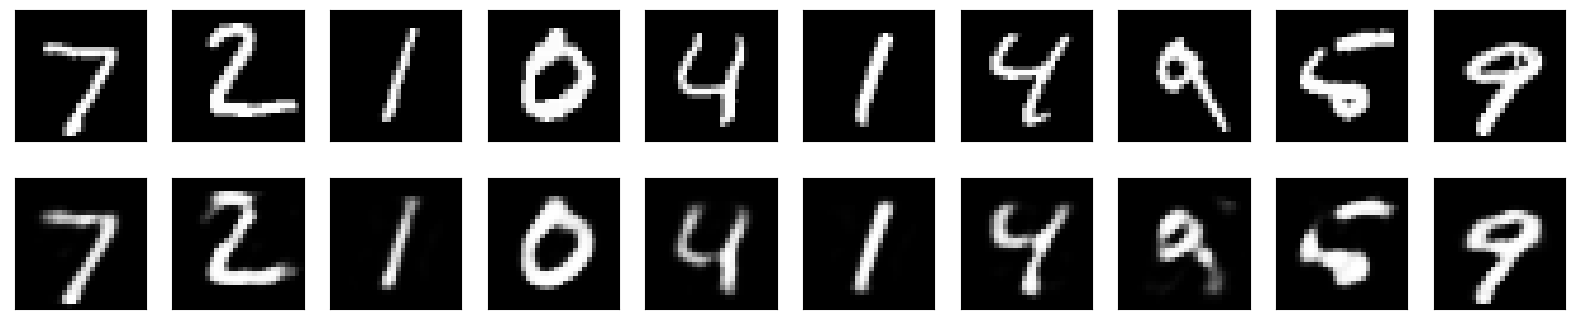

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# --- 1. Load and Preprocess Data ---
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# --- 2. Build the Autoencoder Model ---
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(32, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# --- 3. Compile and Train the Model ---
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# --- 4. Evaluate and Predict ---
test_loss = autoencoder.evaluate(x_test, x_test)
decoded_imgs = autoencoder.predict(x_test)
print("\nTest Loss:", test_loss)

# --- 5. Visualize Original vs. Reconstructed Images ---
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

# **FIXED: Indentation added to the for loop block**
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# **FIXED: plt.show() moved outside the loop**
plt.show()